In [1]:
print("Graphs")

Graphs


In [2]:
from utils import draw_graph, draw_graph_nodes

In [ ]:
from collections import deque


class UndirectedGraph:
    def __init__(self, labels) -> None:
        self.labels = labels  # ["a", "b", "c"]
        self.num_vertices = len(labels)
        self.adj_matrix = [[0] * self.num_vertices for _ in range(self.num_vertices)]
        # [
        #  [0, 0, 0],
        #  [0, 0, 0],
        #  [0, 0, 0]
        # ]

    def label_to_index(self, label):
        if label not in self.labels:
            raise ValueError(f"label {label} not found in graph")
        return self.labels.index(label)

    def add_edge(self, label1, label2):  # g.add_edge("a", "b")
        u = self.label_to_index(label1)  # 0
        v = self.label_to_index(label2)  # 1
        self.adj_matrix[u][v] = 1
        self.adj_matrix[v][u] = 1

    def add_edge_weighted(self, label1, label2, weight=1):
        u = self.label_to_index(label1)
        v = self.label_to_index(label2)
        self.adj_matrix[u][v] = weight
        self.adj_matrix[v][u] = weight

    def remove_edge(self, label1, label2):
        u = self.label_to_index(label1)
        v = self.label_to_index(label2)
        self.adj_matrix[u][v] = 0
        self.adj_matrix[v][u] = 0

    # depth first search -> stack -> (recursion)
    def dfs(self, start_label):
        visited = set()

        def dfs_helper(label):
            print(label)  # action
            visited.add(label)
            curr_ind = self.label_to_index(label)

            for neighbor_ind, is_connected in enumerate(self.adj_matrix[curr_ind]):
                neighbor_label = self.labels[neighbor_ind]
                if is_connected > 0 and neighbor_label not in visited:
                    dfs_helper(neighbor_label)

        dfs_helper(start_label)

    # breadth first search -> queue -> (iterative)
    def bfs(self, start_label):
        visited = set()
        queue = deque()
        queue.append(start_label)
        visited.add(start_label)
        while queue:
            curr_label = queue.popleft()
            print(curr_label)  # action
            curr_ind = self.label_to_index(curr_label)

            for neighbor_ind, is_connected in enumerate(self.adj_matrix[curr_ind]):
                neighbor_label = self.labels[neighbor_ind]
                if is_connected > 0 and neighbor_label not in visited:
                    queue.append(neighbor_label)
                    visited.add(neighbor_label)

    def detect_cycle(self):
        # A list to keep track of every node we have visited across the whole graph So we don't start over and over.
        visited = [False] * self.num_vertices

        # Define a recursive helper function for Depth-First Search.
        # 'curr' is the node we are currently standing in.
        # 'parent' is the node we just came from.
        def dfs_helper(curr, parent):
            # Step 2: Mark the current node as visited so we don't start a new DFS here later.
            visited[curr] = True

            # Step 3: Look at every possible node in the graph to find neighbors.
            for neighbor in range(self.num_vertices):

                # Step 4: Check the adjacency matrix to see if an edge exists, if there's a connection.
                if self.adj_matrix[curr][neighbor] != 0:

                    # Case A: If we haven't visited this neighbor yet, move into it.
                    if not visited[neighbor]:
                        # Recurse: Move to the neighbor, setting our current node as its parent.
                        is_cycle = dfs_helper(neighbor, curr)
                        # If that path eventually finds a cycle, pass the "True" back up the recursion chain.
                        if is_cycle:
                            return True

                    # Case B: If the neighbor IS visited, check if it's a cycle or just the way back.
                    # In an undirected graph, A -> B is the same edge as B -> A.
                    # If the visited neighbor is *not* the parent, we've found a new path to an old node.
                    elif neighbor != parent:
                        # A cycle exists.
                        return True

            # If we finish checking all neighbors and found no cycles, return False.
            return False

        # Step 1: Iterate through every vertex in the graph.
        for vertex in range(self.num_vertices):
            # If the vertex hasn't been visited yet, start a fresh DFS.
            # This is necessary in case the graph is disconnected (multiple separate islands).
            if not visited[vertex]:
                # Start DFS with -1 as the parent, because the first node has no parent.
                if dfs_helper(vertex, -1):
                    # If any single component contains a cycle, the whole graph has a cycle. Exit early.
                    return True

        # If we've checked every node in every component and found nothing.
        return False

In [ ]:
labels = ["a", "b", "c"]
ug = UndirectedGraph(labels)

ug.add_edge("a", "c")
ug.add_edge("c", "b")
ug.remove_edge("c", "a")

print(ug.adj_matrix)

draw_graph(ug)

Is there a circle in our dungeon?  False


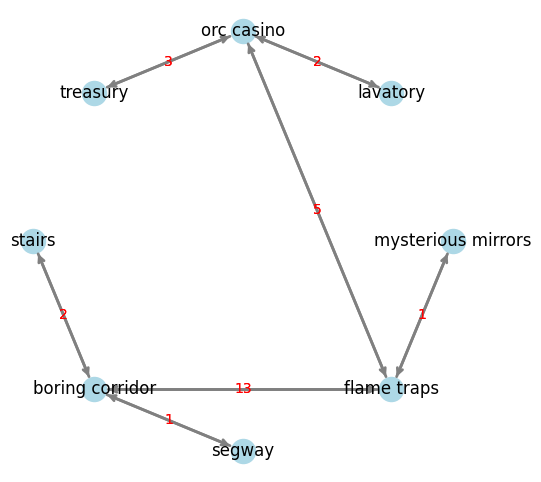

In [9]:
rooms = [
    "stairs",
    "boring corridor",
    "segway",
    "flame traps",
    "mysterious mirrors",
    "lavatory",
    "orc casino",
    "treasury",
]

dungeon = UndirectedGraph(rooms)
dungeon.add_edge_weighted("treasury", "orc casino", 3)
dungeon.add_edge_weighted(rooms[5], rooms[6], 2)
dungeon.add_edge_weighted(rooms[6], rooms[3], 5)
dungeon.add_edge_weighted("boring corridor", "flame traps", 13)
dungeon.add_edge_weighted("boring corridor", "stairs", 2)
dungeon.add_edge_weighted("boring corridor", "segway", 1)
dungeon.add_edge_weighted("mysterious mirrors", "flame traps", 1)
# dungeon.add_edge("mysterious mirrors", "boring corridor")


# dungeon.dfs("flame traps")
# print("----------")
# dungeon.bfs("flame traps")

print("Is there a circle in our dungeon? ", dungeon.detect_cycle())
draw_graph(dungeon)

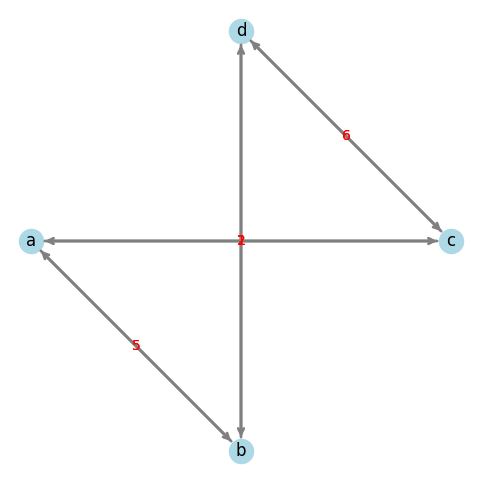

In [14]:
labels = ["a", "b", "c", "d"]
g = UndirectedGraph(labels)

g.add_edge_weighted("a", "b", 5)
g.add_edge_weighted("a", "c", 2)
g.add_edge_weighted("b", "d", 1)
g.add_edge_weighted("c", "d", 6)

draw_graph(g)

In [ ]:
# Dijkstra's Algorithm
def dijkstra(graph, start_label):
    # Setup
    labels = graph.labels
    n = graph.num_vertices
    # Keeps track of nodes, we visited already, whose shortest path is confirmed
    known = [False] * n
    # Initialize all costs as infinite; we don't know how far they are yet
    cost = [float("inf")] * n
    # Predecessor array: stores the 'parent' node to reconstruct the path later
    path = [None] * n

    # human-readable start label (e.g., 'A') to numeric index
    start_index = labels.index(start_label)

    # The distance from the start to itself is always 0 - also needed to kick off exploration
    cost[start_index] = 0

    # Exploration - Core Algorithm
    for _ in range(n):
        # -> GREEDY selection: Find the closest unvisited node
        # Could be optimized with a 'priority queue'
        min_cost = float("inf")
        min_vertex = -1

        for i in range(n):
            if not known[i] and cost[i] < min_cost:
                min_cost = cost[i]
                min_vertex = i

        if min_vertex == -1:
            break
        # End greedy selection

        # Mark this node as visited; we've found its shortest path
        known[min_vertex] = True

        # -> RELAXATION: Update distances to all neighbors of the current node
        for neighbor in range(n):  # this could be optimized with an adjacency list
            # get the weight (connection cost) from our current node to every other node
            weight = graph.adj_matrix[min_vertex][neighbor]

            # if there is a connection, and we haven't visited so far...
            if weight > 0 and not known[neighbor]:
                # cost to neighbor is cost to current node plus the next edge
                new_cost = cost[min_vertex] + weight

                # If going through 'min_vertex' is shorter than the current known distance
                if new_cost < cost[neighbor]:
                    cost[neighbor] = new_cost  # Update the cost
                    path[neighbor] = min_vertex  # Update the 'parent' for the path

    # End core algorithm

    # Build the result: cost + reconstruct path
    result = {}
    for i, label in enumerate(labels):
        if cost[i] == float("inf"):
            # Case: The node is totally isolated from the start
            result[label] = {"cost": None, "path": []}
        else:
            # Reconstruct the path by 'backtracking' from destination to start
            path_indices = []
            current = i
            while current is not None:
                path_indices.append(current)
                current = path[current]
            # The backtracking gives us [End, ..., Start], so we flip it
            path_indices.reverse()

            # Map the numeric indices back to original labels (e.g., [0, 2] -> ['A', 'C'])
            path_labels = [labels[idx] for idx in path_indices]

            result[label] = {"cost": cost[i], "path": path_labels}

    return result


dijkstra(g, "a")

{'a': {'cost': 0, 'path': ['a']},
 'b': {'cost': 5, 'path': ['a', 'b']},
 'c': {'cost': 2, 'path': ['a', 'c']},
 'd': {'cost': 6, 'path': ['a', 'b', 'd']}}